# Housing Price Prediction

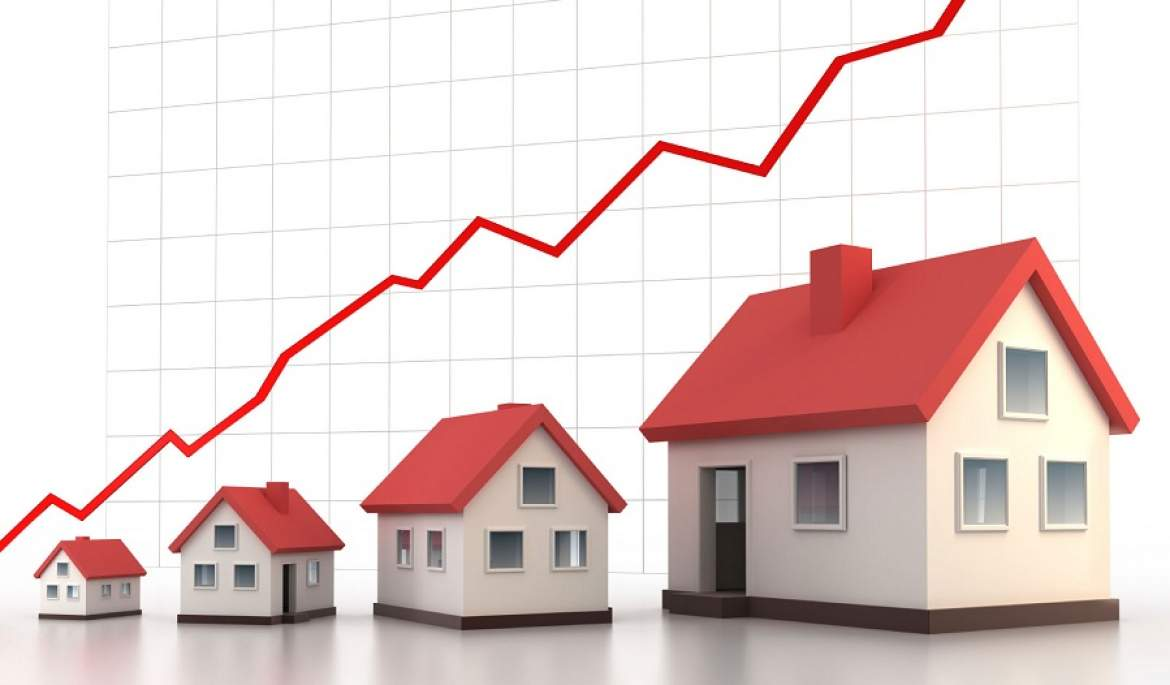

## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Approach to solve this problem shall be as under:
- EDA shall be as under:

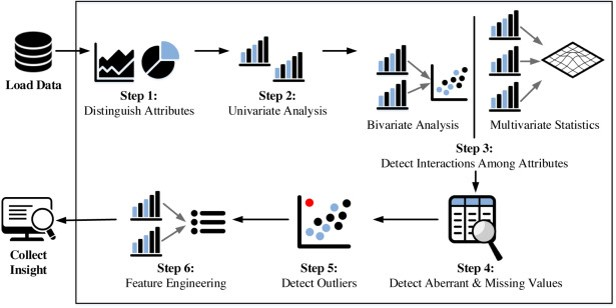

After all above stepls model building process shall be started

In [21]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
%matplotlib inline

In [22]:
#Reading data
#Housing data= hd
hd= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
#Sale price is our dependent/target variable

In [24]:
#Understanding data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# Checking columns with null value more than 50%
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [26]:
#Dropping columns with null value ~50% including variable FireplaceQu having 47.26% null values
hd=hd.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [27]:
#As we can see there are multiple categorical varaibles lets list them out as ordinal, nominal categorical variables,
#Continous/numeric variavles, year & month etc.
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

numeric = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF1","BsmtFinSF2"]

date_time = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [28]:
# ALl the Numeric variables are either int or float type data type
#Lot size and MiscVal has higher values in comparison to other numeric varaibles, thus it will be analyzied seperately
numeric.remove("LotArea") 
numeric.remove("MiscVal") 

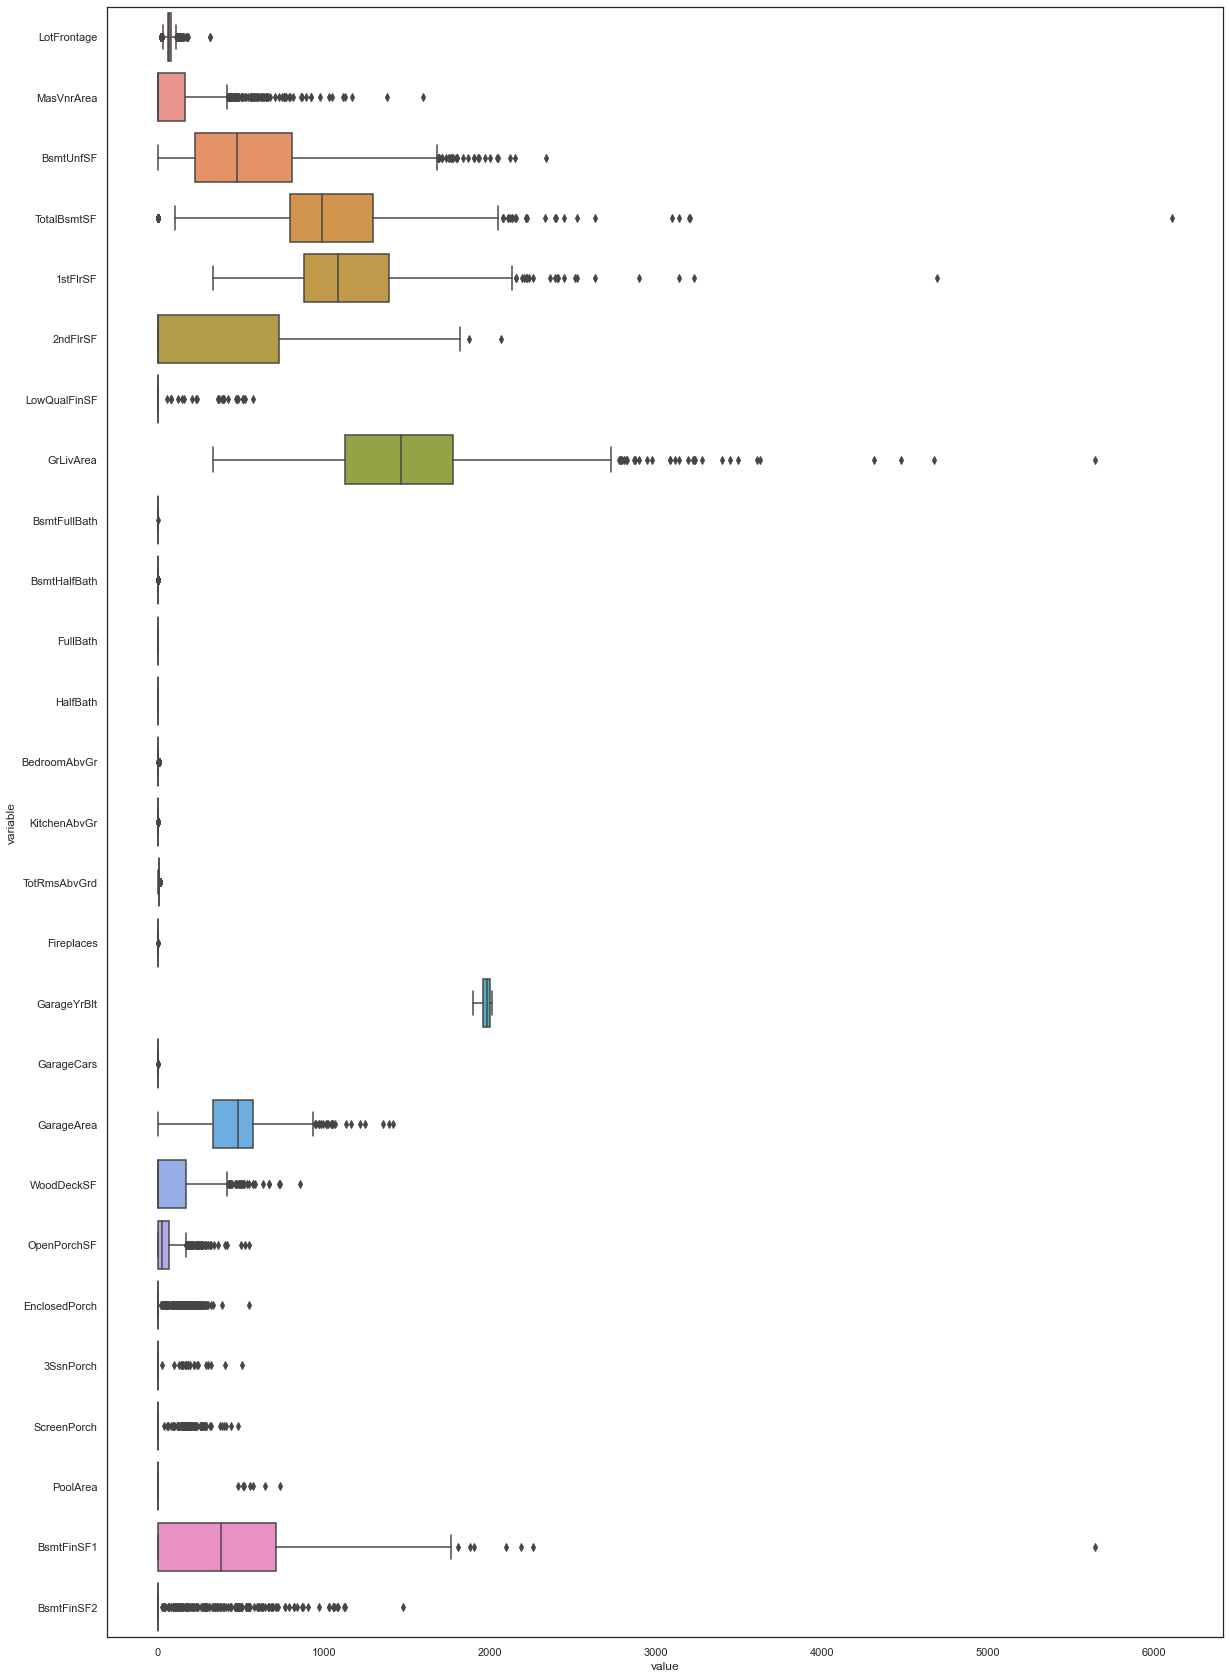

In [29]:
#Lets do the univariate analysis on Numeric data typesLotArea
plt.figure(figsize=(20,30))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[numeric]))
plt.show()

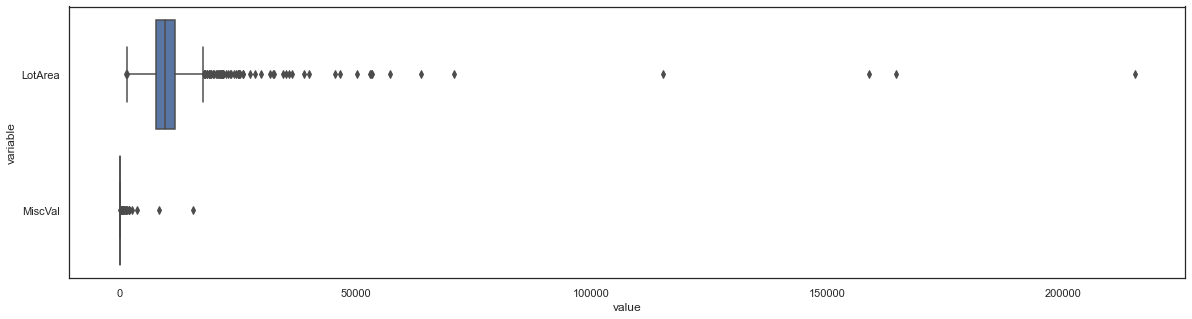

In [30]:
#box plot for LotArea and MiscVal variable
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[["LotArea","MiscVal"]]))
plt.show()

There are lots of outliers in various columns and we have to treat them before modeling

In [31]:
numeric.append("LotArea")
numeric.append("MiscVal")

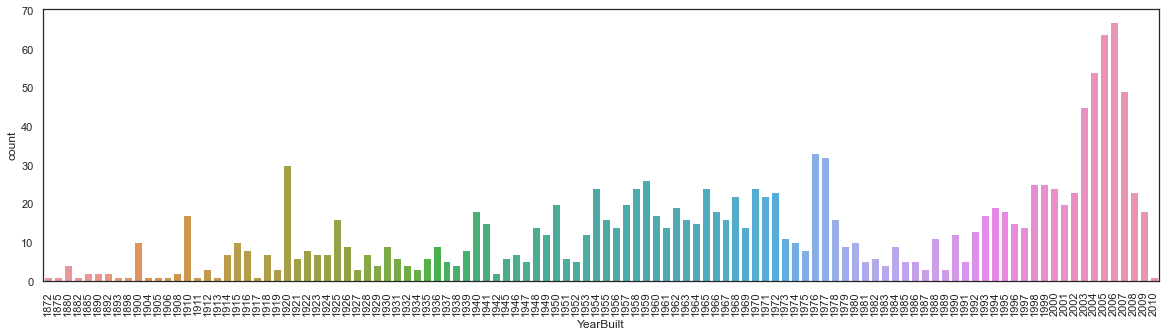

In [32]:
#Lets Visualize frequency of houses built in each year
#date_time = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd_YearBuilt=hd.sort_values("YearBuilt", axis =0)
plt.figure(figsize=(20,5))
sns.countplot(hd_YearBuilt["YearBuilt"])
plt.xticks(rotation =90)
plt.show()

There is a significant increase in houses being built around 2003 to 2007, may be leading to housing crash of 2008 :p

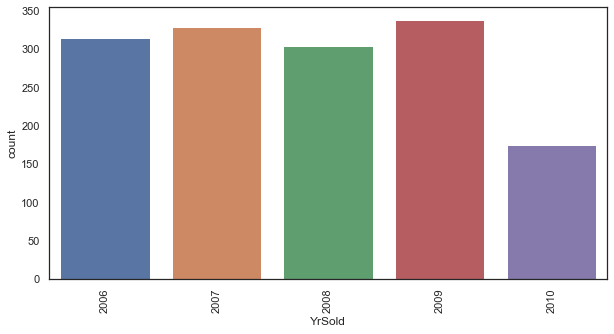

In [33]:
#Lets Visualize frequency of sales made in each year
hd_YrSold=hd.sort_values("YrSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_YrSold["YrSold"])
plt.xticks(rotation =90)
plt.show()

There is no regular trend among no. of houses sold except that no. of houses sold in 2010 has significantly decreased, however we donot know whether data is for complete year 2010  or not, so will not speculate regarding this.

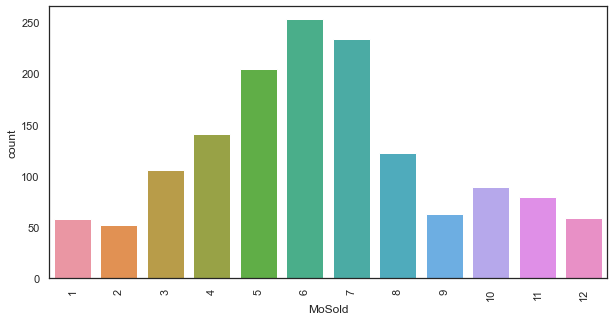

In [34]:
#Lets Visualize frequency of sales made in each month
hd_MoSold=hd.sort_values("MoSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_MoSold["MoSold"])
plt.xticks(rotation =90)
plt.show()

It seems like sales are higher in the month of May, June and July comapared to other months of year.

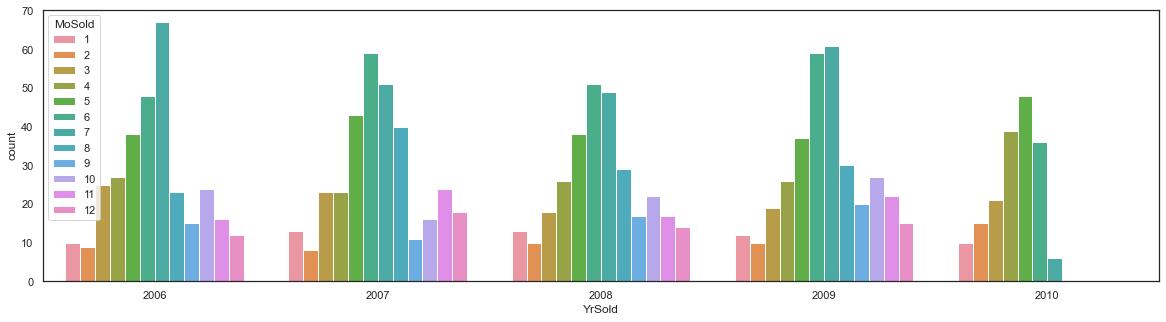

In [35]:
#Lets check whether above trend is same for all years in which houses were sold
plt.figure(figsize=(20,5))
#hd_month_yr=hd.groupby(["YrSold","MoSold"]).count().reset_index()
#hd_month_yr
sns.countplot(data=hd, x="YrSold", hue="MoSold")
plt.show()

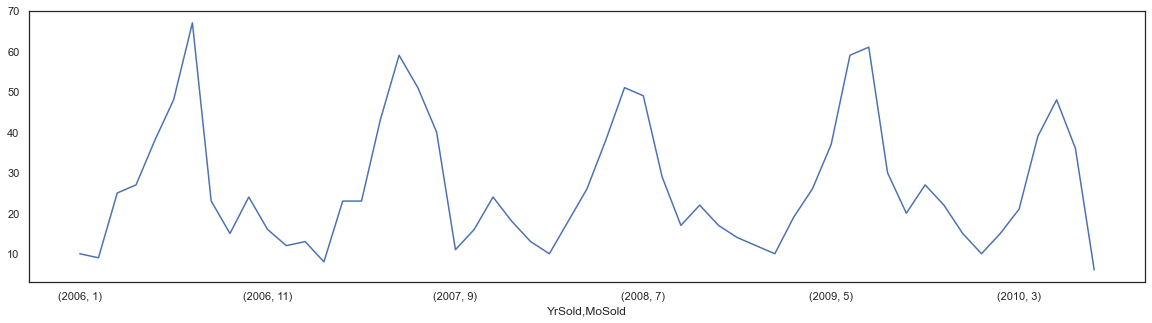

In [36]:
plt.figure(figsize=(20,5))
hd_month_yr=hd.groupby(["YrSold","MoSold"])["MoSold"].count().plot()
plt.show()

From above it is observed that sales are higher in the month of May, June and July compared to other months of year may be due spring season as the weather gets warmer in USA.

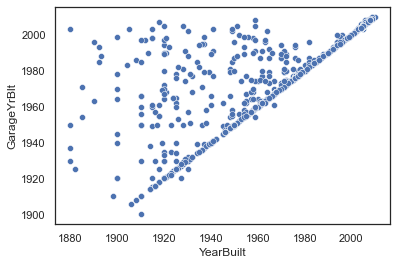

In [37]:
#Lets Visualize distribution among YearBuilt & GarageYrBlt
sns.scatterplot(data=hd,x="YearBuilt",y="GarageYrBlt")
plt.show()

After 1910 almost all the house are having garrages built along with construction of house due to rise in no of car user by 1910 in US.
- Source:
https://www.ushistory.org/us/46a.asp

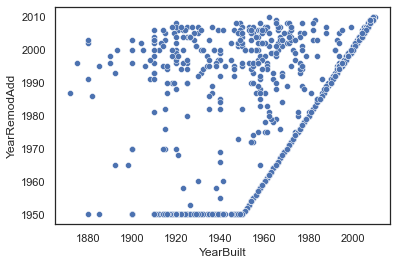

In [38]:
#Lets Visualize distribution among YearBuilt & YearRemodAdd
sns.scatterplot(data=hd,x="YearBuilt",y="YearRemodAdd")
plt.show()

After 1950 there has been no remodeling or additions performed on houses as in data it is specified that YearRemodAdd is same as construction date if no remodeling or additions.

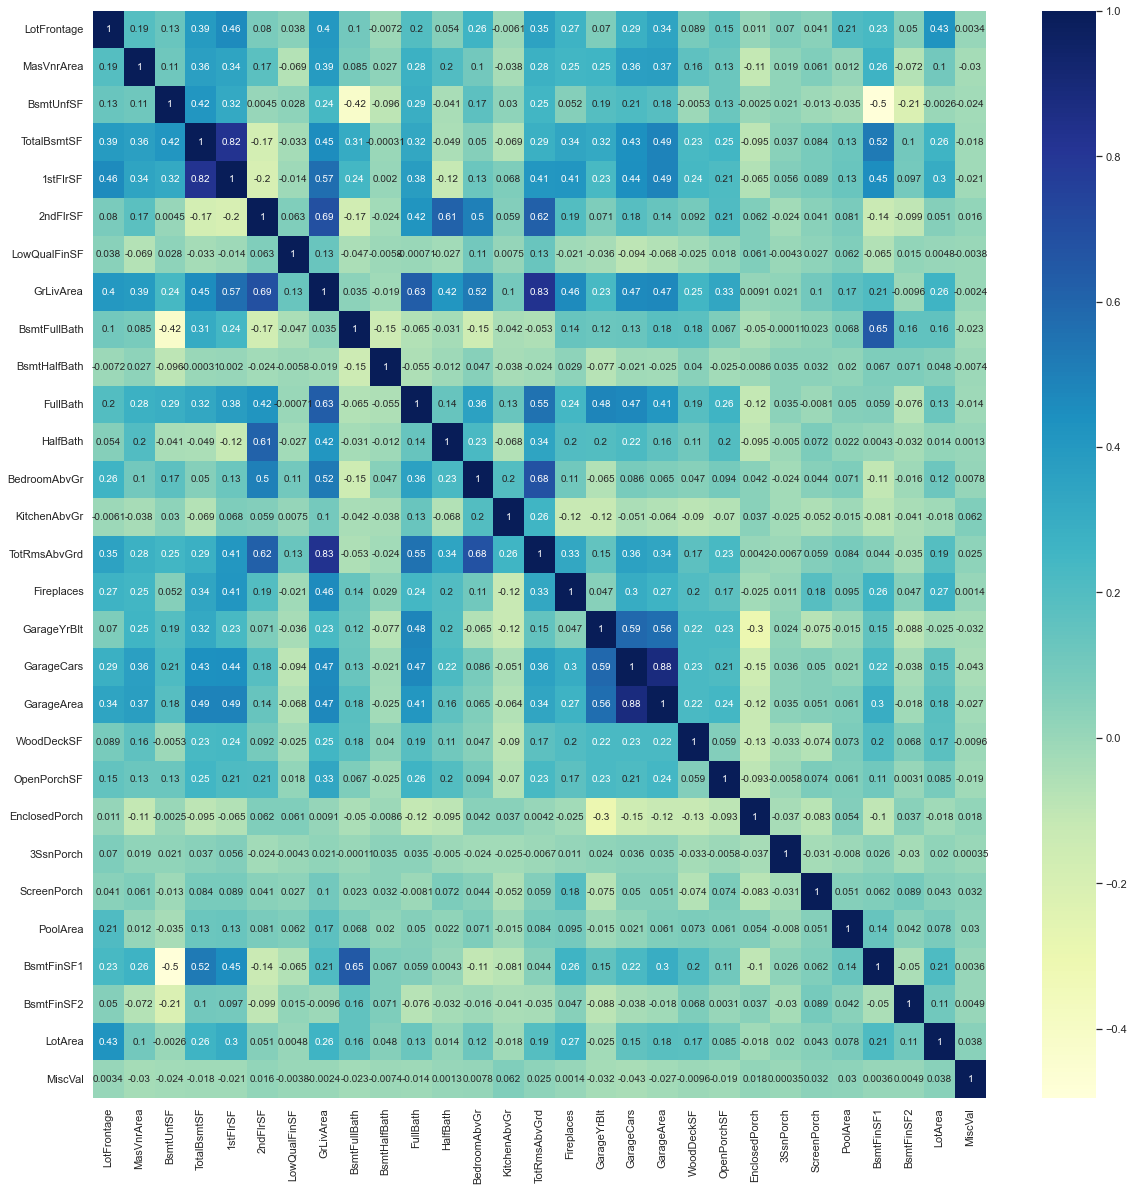

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(hd[numeric].corr(),annot= True,cmap="YlGnBu")
plt.show()

There are few columns with high corelation like (BsmtFinSF2 and BsmtfullBath),(GarageCars and Garage Area), (Ground Living area and TotRmsaboveGr),(Bedroom above ground and Total Room above Ground), (TotalBasment SF and  1st floor SF)  etc.

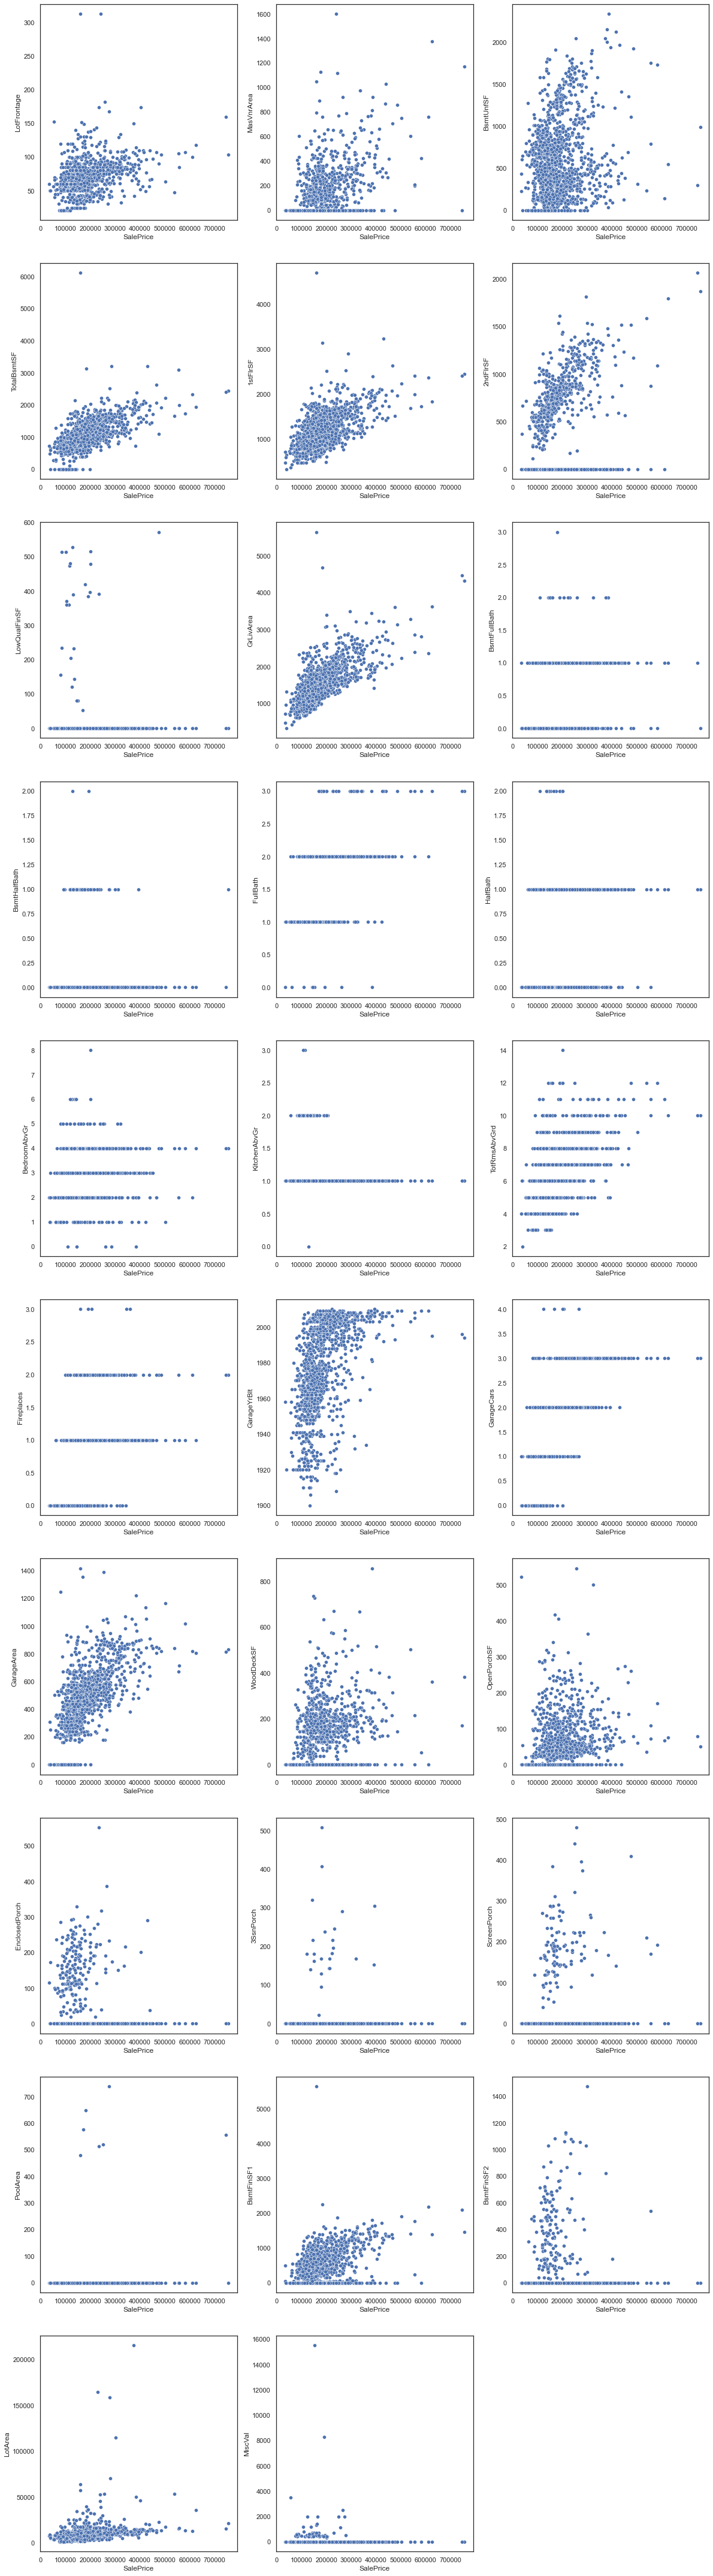

In [41]:
#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.scatterplot(data=hd, x= "SalePrice",y=i)
    j=j+1

There are many independent Variable on which there is high correlation with Sale price like GrLivArea, TotalBsmtSF,Garage Area, 1stflrSF etc

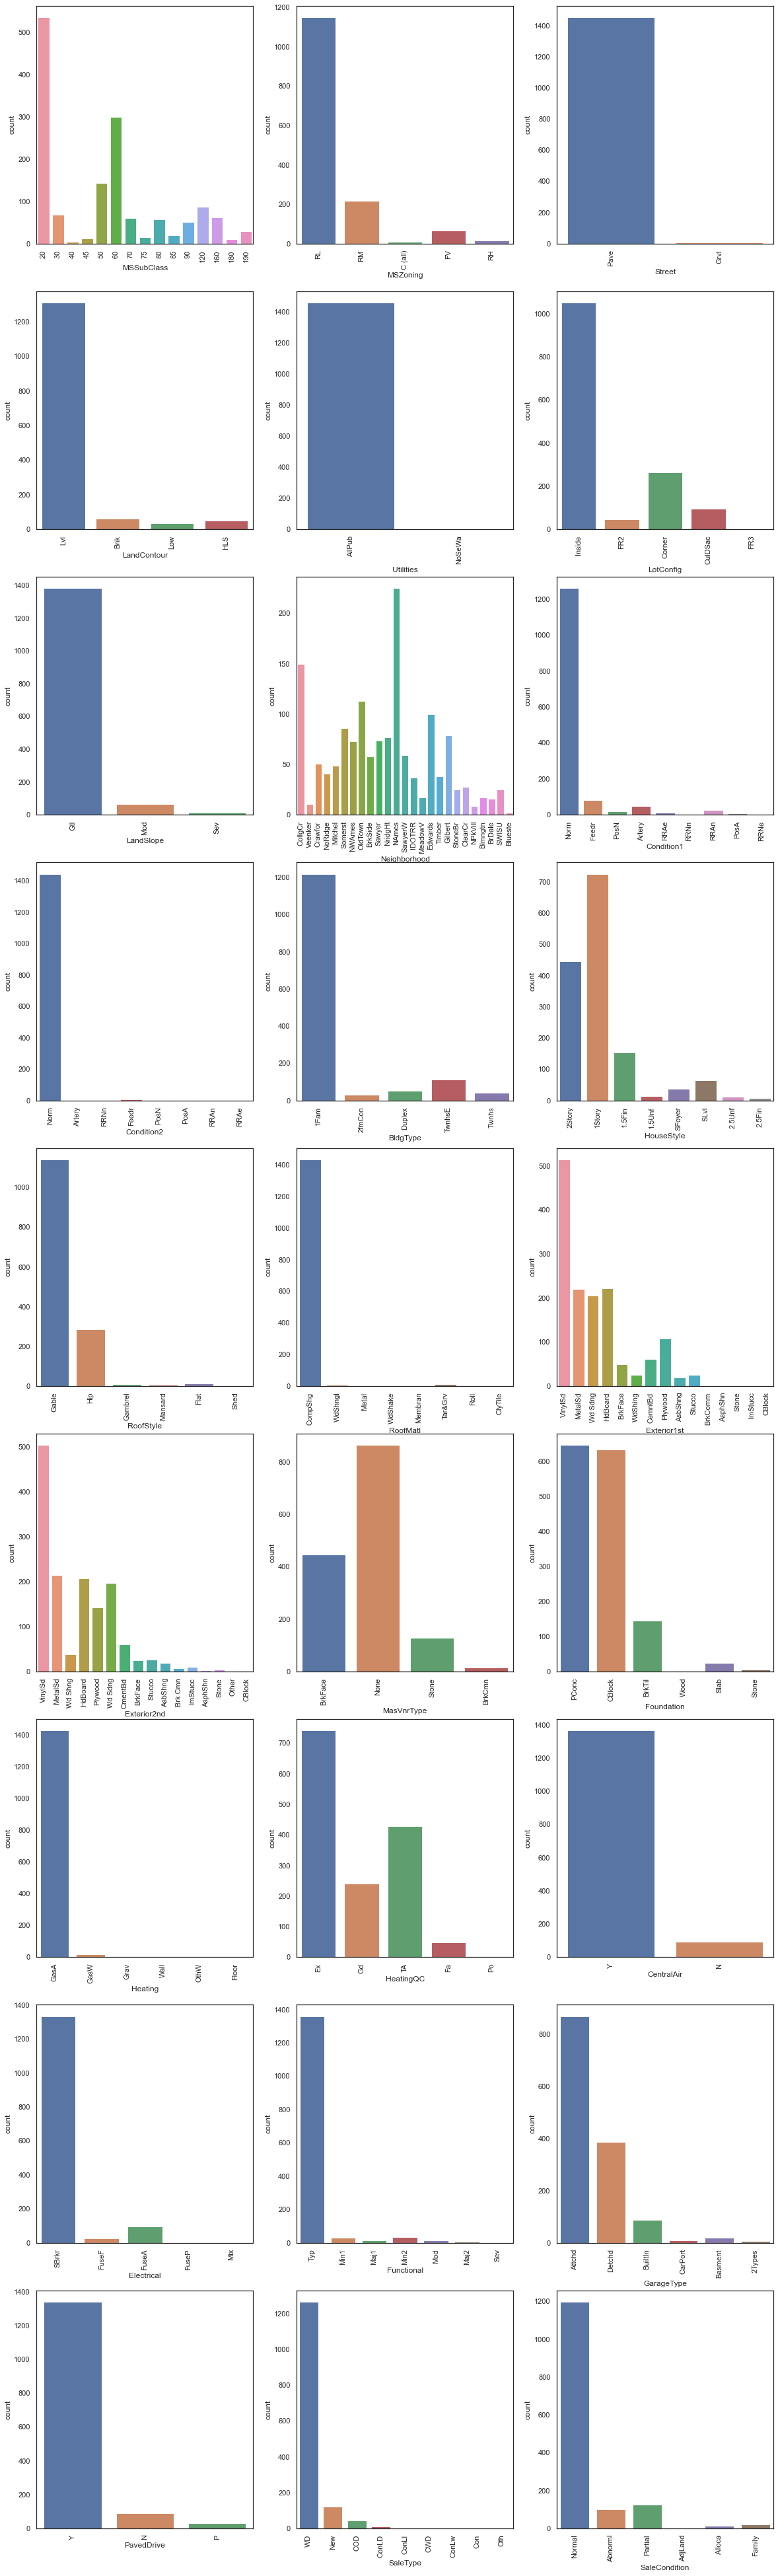

In [42]:
#Lets visualize countplot on Nominal data
plt.subplots(figsize=(20,110))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.countplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1
